In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
%load_ext autoreload
%autoreload 2
from FunctionalSmoothingSpline import *

# Example 2 and 3

In [2]:
filename = "./Sales2.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData.head()

,t,Values
0,01.12.2009,285.06
1,17.12.2009,391.44
2,31.01.2010,304.47
3,07.03.2010,337.74
4,26.03.2010,286.58


In [3]:
t = pd.to_datetime(MyData.t.dropna(), format='%d.%m.%Y')
t_start = min(t)
t = np.array([(x-t_start).days for x in t])
Y = MyData.Values.dropna().to_numpy()
n = len(t)
Y = Y[0:(n-1)]
m = round(3*n)
t

array([  0,  16,  61,  96, 115, 128, 136, 148, 154, 159, 175, 183, 191,
       209, 230, 240, 261, 269, 290, 303, 472, 518, 567, 589, 619, 649])

In [4]:
n

26

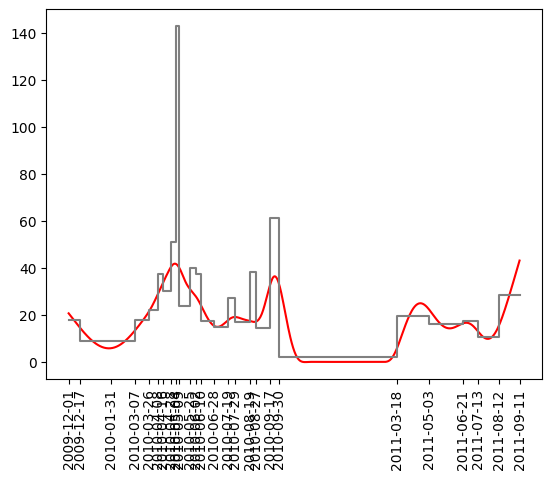

In [11]:
r = FunctionalSmoothingSpline(	t_int_a = t[0:(n-1)],
                				t_int_b = t[1:n], 
                				values_int = Y,
                				knots_number = m,
                				alpha = 10**5,
                                All_Positive = True, integral = False, info = True)
#print(r)
x = r['x']
y = r['y']

plt.plot(x, y, color = "red")
x2 = np.array([])
y2 = np.array([])
for i in range(n-1):
    x2 = np.append(x2,[ t[i], t[i+1] ])
    y2 = np.append(y2, [ Y[i]/(t[i+1]-t[i]), Y[i]/(t[i+1]-t[i]) ] )
plt.plot(x2,y2,color="grey")#,type="l",lwd="2",lty=1)
plt.xticks(ticks=t, labels=[(t_start+pd.Timedelta(tx,"d")).date() for tx in t], rotation='vertical')
plt.show()

In [10]:
y

array([ 1.93760610e+01,  1.91848566e+01,  1.89935008e+01,  1.88018419e+01,
        1.86097285e+01,  1.84170091e+01,  1.82235321e+01,  1.80291461e+01,
        1.78336995e+01,  1.76370244e+01,  1.74386771e+01,  1.72379853e+01,
        1.70342694e+01,  1.68268502e+01,  1.66150482e+01,  1.63981841e+01,
        1.61755785e+01,  1.59465521e+01,  1.57104862e+01,  1.54669210e+01,
        1.52154225e+01,  1.49555565e+01,  1.46868891e+01,  1.44089861e+01,
        1.41214136e+01,  1.38237375e+01,  1.35155666e+01,  1.31969321e+01,
        1.28681045e+01,  1.25293572e+01,  1.21809635e+01,  1.18231969e+01,
        1.14563306e+01,  1.10806382e+01,  1.06963954e+01,  1.03041071e+01,
        9.90468058e+00,  9.49906431e+00,  9.08820674e+00,  8.67305630e+00,
        8.25456145e+00,  7.83367061e+00,  7.41133224e+00,  6.98854889e+00,
        6.56665712e+00,  6.14712079e+00,  5.73140400e+00,  5.32097084e+00,
        4.91728542e+00,  4.52181183e+00,  4.13601418e+00,  3.76137212e+00,
        3.39987922e+00,  

# Example 1

In [56]:
filename = "./DiscrSignals.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData

,t_f,y_f,t_df,y_df,t_d2f,y_d2f,t_int_a,t_int_b,y_int
0,20.02.2021,100.0,31.03.2021,0.000000,19.05.2021,0.0,25.03.2021,24.04.2021,3999.916
1,08.12.2021,20.0,07.05.2021,-1.749674,NaN,NaN,21.10.2021,20.11.2021,2281.669
2,01.01.2022,0.0,06.07.2021,0.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,11.08.2021,1.552171,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,29.09.2021,0.000000,NaN,NaN,NaN,NaN,NaN


In [57]:
t_f = pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')
t_df = pd.to_datetime(MyData.t_df.dropna(), format='%d.%m.%Y')
t_d2f = pd.to_datetime(MyData.t_d2f.dropna(), format='%d.%m.%Y')
t_int_a = pd.to_datetime(MyData.t_int_a.dropna(), format='%d.%m.%Y')
t_int_b = pd.to_datetime(MyData.t_int_b.dropna(), format='%d.%m.%Y')

t_start = min(t_f[0],t_df[0],t_d2f[0],t_int_a[0])
t_f = np.array([(x-t_start).days for x in t_f])
t_df = np.array([(x-t_start).days for x in t_df])
t_d2f = np.array([(x-t_start).days for x in t_d2f])
t_int_a = np.array([(x-t_start).days for x in t_int_a])
t_int_b = np.array([(x-t_start).days for x in t_int_b])

y_f = MyData.y_f.dropna().to_numpy()
y_df = MyData.y_df.dropna().to_numpy()
y_d2f = MyData.y_d2f.dropna().to_numpy()
y_int = MyData.y_int.dropna().to_numpy()

nf = len(t_f)
ndf = len(t_df)
nd2f = len(t_d2f)
nint = len(t_int_a)
m = round(3*(nf + ndf + nd2f + nint))
m

33

C:\Users\yuako\MyProject\FunctionalSmoothingSpline\FunctionalSmoothingSpline.py:336: RuntimeWarning: invalid value encountered in divide
  relative_abs_error_f = (np.transpose(V) @ Wf @ V).item() / nf


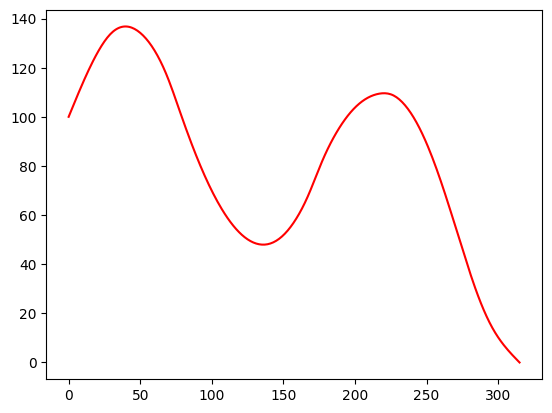

In [59]:
r = FunctionalSmoothingSpline(	t_f = t_f,
                				values_f = y_f,
                				t_df = t_df,
                				values_df = y_df,
                				t_d2f = t_d2f,
                				values_d2f = y_d2f,
                				t_int_a = t_int_a,
                				t_int_b = t_int_b, 
                				values_int = y_int,
                				knots_number = m,
                				alpha = 10**0,
                                All_Positive = True,
                				info = True)
#print(r)
x = r['x']
y = r['y']
#xrange = range(x)
#yrange = range(y)
plt.plot(x, y, color = "red")#, type = "l", lwd = "1", lty = 1,  xaxt = "n", ylim = yrange, xlim = xrange)
#axis(1, at = c(t_f,t_df,t_d2f,t_int_a,t_int_b), labels = as.Date(c(t_f,t_df,t_d2f,t_int_a,t_int_b), origin=origin))
